# Heme bound to cytochrome C
This examples highlights the histidine residue of cytochrome C that binds to its heme ligand.

In [1]:
import numpy as np
import matplotlib.colors as colors
import biotite
import biotite.structure as struc
import biotite.structure.io.mmtf as mmtf
import biotite.database.rcsb as rcsb
import ammolite


PNG_SIZE = (200, 200)

In [2]:
# General configuration
ammolite.cmd.bg_color("white")
ammolite.cmd.set("cartoon_side_chain_helper", 1)
ammolite.cmd.set("cartoon_oval_length", 0.8)
ammolite.cmd.set("depth_cue", 0)
ammolite.cmd.set("valence", 0)

In [3]:
# Define colors used later
ammolite.cmd.set_color("lightorange",  colors.to_rgb(biotite.colors["lightorange"]))
ammolite.cmd.set_color("lightgreen",   colors.to_rgb(biotite.colors["lightgreen" ]))
ammolite.cmd.set_color("darkgreen",    colors.to_rgb(biotite.colors["darkgreen"  ]))

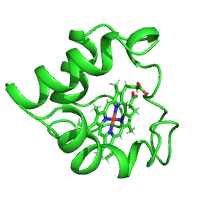

In [4]:
# Fetch and load cytochrome C structure and remove water 
mmtf_file = mmtf.MMTFFile.read(rcsb.fetch("1C75", "mmtf"))
structure = mmtf.get_structure(mmtf_file, model=1, include_bonds=True)
cyt_c = structure[structure.res_name != "HOH"]

pymol_cyt_c = ammolite.PyMOLObject.from_structure(cyt_c)
ammolite.show(PNG_SIZE)

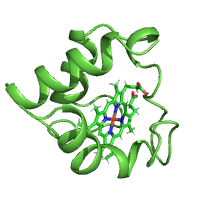

In [5]:
# Style protein
protein_mask = struc.filter_amino_acids(cyt_c)

pymol_cyt_c.show_as("cartoon", protein_mask)
pymol_cyt_c.color("lightgreen", protein_mask & (cyt_c.element == "C"))
ammolite.show(PNG_SIZE)

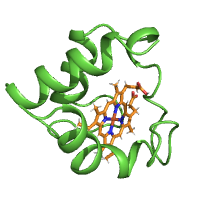

In [6]:
# Style heme group
heme_mask = (cyt_c.res_name == "HEM")

pymol_cyt_c.show_as("sticks", heme_mask)
pymol_cyt_c.color("lightorange", heme_mask & (cyt_c.element == "C"))
ammolite.show(PNG_SIZE)

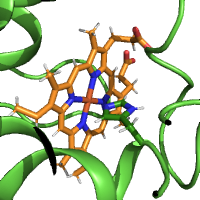

In [28]:
# Mark the histidine bound to heme as sticks
heme_iron_coord = cyt_c[cyt_c.element == "FE"].coord[0]
adjacency_mask = (struc.distance(cyt_c.coord, heme_iron_coord) < 2.0)
bound_nitrogen_mask = adjacency_mask & (cyt_c.res_name == "HIS")
his_mask = (cyt_c.res_id == cyt_c.res_id[bound_nitrogen_mask])

pymol_cyt_c.show("sticks", his_mask)
pymol_cyt_c.color(
    "darkgreen",
    his_mask & (cyt_c.element == "C") & (cyt_c.atom_name != "CA")
)
ammolite.show(PNG_SIZE)

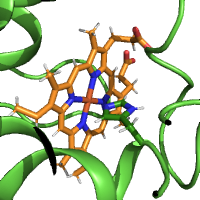

In [8]:
# Zoom into binding site
pymol_cyt_c.zoom(heme_mask | his_mask, buffer=1.0)
ammolite.show(PNG_SIZE)

In [30]:
import warnings
warnings.filterwarnings('ignore')
import mbuild as mb
c1 = mb.load('mdk4rig.pdb')
c1.visualize()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [29]:
import warnings
warnings.filterwarnings('ignore')
import mbuild as mb
c1 = mb.load('mdk2_rig.pdb')
c1.visualize()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [10]:
from tempfile import gettempdir
import biotite.database.rcsb as rcsb

file_path = rcsb.fetch("1l2y", "pdb", gettempdir())
print(file_path)

/tmp/1l2y.pdb


In [11]:
file_paths = rcsb.fetch(["1l2y", "1aki"], "cif", gettempdir())
print([file_path for file_path in file_paths])

['/tmp/1l2y.cif', '/tmp/1aki.cif']


In [12]:
query = rcsb.BasicQuery("HCN1")
pdb_ids = rcsb.search(query)
print(pdb_ids)
print(rcsb.count(query))
files = rcsb.fetch(pdb_ids, "mmtf", gettempdir())

['2XPI', '3U0Z', '5U6O', '5U6P', '3U10', '3U11', '6UQF', '6UQG', '4NVP', '2MNG']
10


In [13]:
# Query for 'lacA' gene
query1 = rcsb.FieldQuery(
    "rcsb_entity_source_organism.rcsb_gene_name.value",
    exact_match="lacA"
)
# Query for resolution below 1.5 Å
query2 = rcsb.FieldQuery("reflns.d_resolution_high", less=1.5)

In [14]:
composite_query = query1 & ~query2
print(rcsb.search(composite_query))

['1KQA', '1KRV', '1KRU', '1KRR', '1TG7', '5MGD', '5MGC', '4DUW', '4LFK', '4LFL', '4LFM', '4LFN', '4IUG', '5JUV', '5IFP', '5IFT', '5IHR', '1XC6']


In [15]:
from tempfile import gettempdir, NamedTemporaryFile
import biotite.database.entrez as entrez

# Fetch a single UID ...
file_path = entrez.fetch(
    "NC_001416", gettempdir(), suffix="fa",
    db_name="nuccore", ret_type="fasta"
)
print(file_path)
# ... or multiple UIDs
file_paths = entrez.fetch(
    ["1L2Y_A","1AKI_A"], gettempdir(), suffix="fa",
    db_name="protein", ret_type="fasta"
)
print([file_path for file_path in file_paths])

/tmp/NC_001416.fa
['/tmp/1L2Y_A.fa', '/tmp/1AKI_A.fa']


In [16]:
print(entrez.get_database_name("Nucleotide"))

nuccore


In [17]:
temp_file = NamedTemporaryFile(suffix=".fasta")
file_path = entrez.fetch_single_file(
    ["1L2Y_A","1AKI_A"], temp_file.name, db_name="protein", ret_type="fasta"
)
print(file_path)
temp_file.close()

/tmp/tmp1etjwdeg.fasta


In [18]:
# Search in all fields
print(entrez.SimpleQuery("BL21 genome"))
# Search in the 'Organism' field
print(entrez.SimpleQuery("Escherichia coli", field="Organism"))

"BL21 genome"
"Escherichia coli"[Organism]


In [19]:
# Return a maximum number of 10 entries
gis = entrez.search(composite_query, "protein", number=10)
print(gis)

['1269208329', '410515422', '221139918', '41281627', '158186633', '11968080', '28076887', '851330596', '90093349', '851329153']


In [20]:
import biotite.sequence as seq
dna = seq.NucleotideSequence("AACTGCTA")
print(dna)

AACTGCTA


In [21]:
dna_seq = seq.NucleotideSequence("ACGTA")
print(dna_seq)

ACGTA


In [22]:
print(dna_seq.code)

[0 1 2 3 0]


In [23]:
print(list(dna_seq))

['A', 'C', 'G', 'T', 'A']


In [24]:
dna_seq = seq.NucleotideSequence("ACGTA")
dna_seq_rev = dna_seq.reverse()
print(dna_seq_rev)

ATGCA


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.database.entrez as entrez

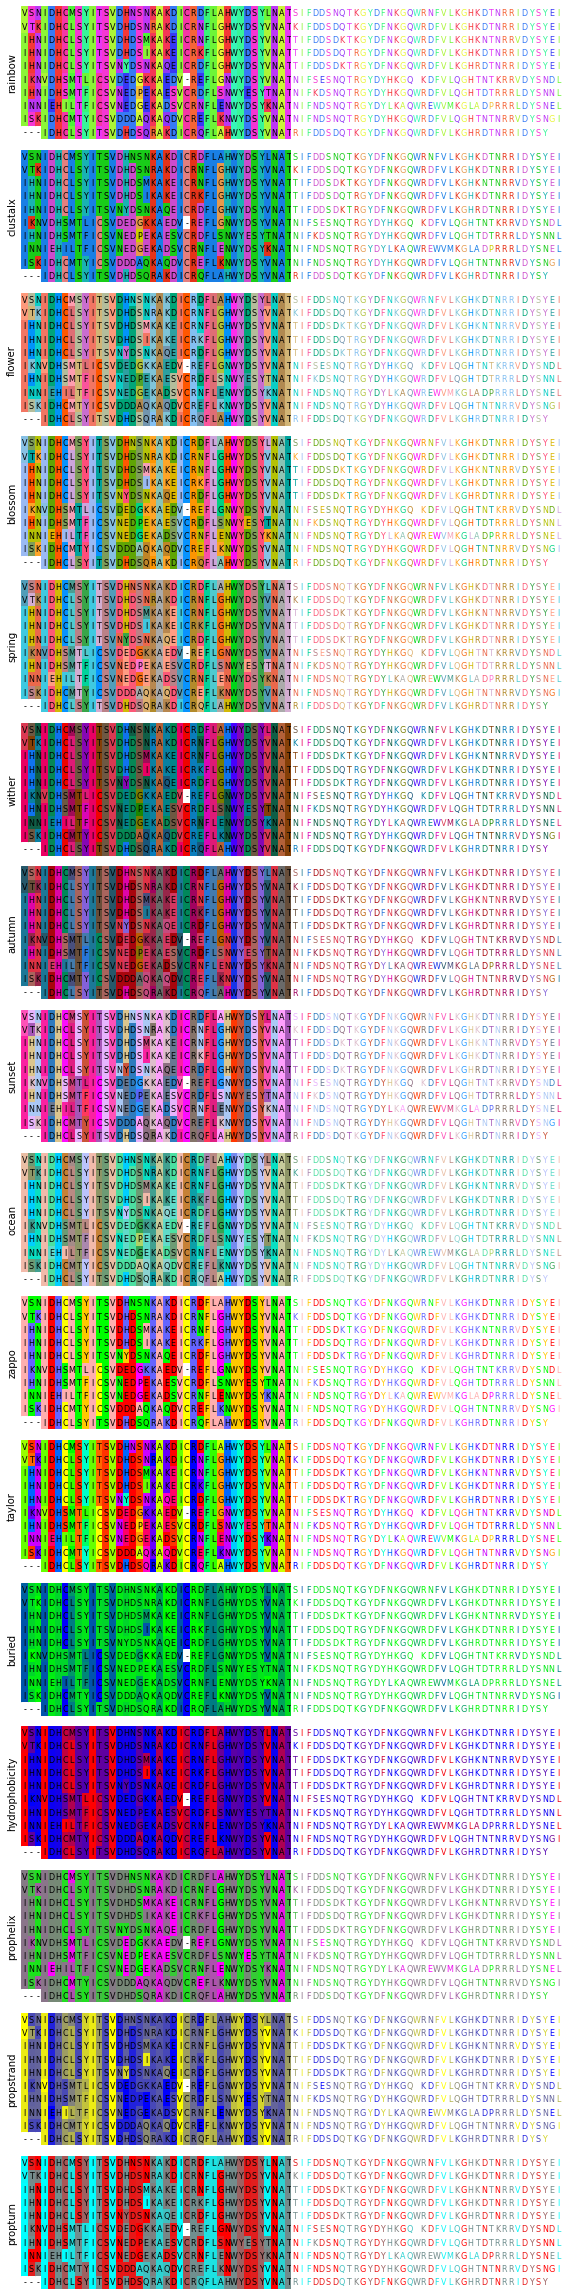

In [26]:
query =   entrez.SimpleQuery("luxA", "Gene Name") \
        & entrez.SimpleQuery("srcdb_swiss-prot", "Properties")
uids = entrez.search(query, db_name="protein")
fasta_file = fasta.FastaFile.read(entrez.fetch_single_file(
    uids, None, db_name="protein", ret_type="fasta"
))
sequences = [seq.ProteinSequence(seq_str) for seq_str in fasta_file.values()]
matrix = align.SubstitutionMatrix.std_protein_matrix()
alignment, order, _, _ = align.align_multiple(sequences, matrix)
# Order alignment according to the guide tree
alignment = alignment[:, order]
alignment = alignment[220:300]

# Get color scheme names
alphabet = seq.ProteinSequence.alphabet
schemes = [
    "rainbow", "clustalx",
    "flower", "blossom", "spring", "wither", "autumn", "sunset", "ocean",
    "zappo", "taylor", "buried", "hydrophobicity",
    "prophelix", "propstrand", "propturn"
]
count = len(schemes)
# Assert that this example displays all available amino acid color schemes
all_schemes = graphics.list_color_scheme_names(alphabet)
assert set(schemes) == set(all_schemes)


# Visualize each scheme using the example alignment
fig = plt.figure(figsize=(8.0, count*2.0))
gridspec = GridSpec(2, count)
for i, name in enumerate(schemes):
    for j, color_symbols in enumerate([False, True]):
        ax = fig.add_subplot(count, 2, 2*i + j + 1)
        if j == 0:
            ax.set_ylabel(name)
            alignment_part = alignment[:40]
        else:
            alignment_part = alignment[40:]
        graphics.plot_alignment_type_based(
            ax, alignment_part, symbols_per_line=len(alignment_part),
            color_scheme=name, color_symbols=color_symbols, symbol_size=8
        )
fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.show()